# Predicting Hypertension class model using Logistic Regression

pip install imports (if not found in the notebook)

In [24]:
import importlib
import subprocess
import sys

def install_if_missing(package, import_name=None):
    try:
        importlib.import_module(import_name or package)
    except ImportError:
        print(f"📦 Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# List of packages (install_name, import_name)
packages = [
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
    ("scikit-learn", "sklearn"),
    ("joblib", "joblib"),
]

# Install as needed
for pkg, imp in packages:
    install_if_missing(pkg, imp)

Import Libraries, Load Dataset

In [25]:

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [26]:
# Load Dataset
df = pd.read_csv("../data/clean/kidney_disease_cleaned.csv")
df.head()

,Age,Blood_Pressure,Specific_Gravity,Albumin,Sugar,Red_Blood_Cells,Pus_Cells,Pus_Cell_Clumps,Bacteria,Blood_Glucose_Random,...,White_Blood_Cell_Count,Red_Blood_Cell_Count,Hypertension,Diabetes_Mellitus,Coronary_Artery_Disease,Appetite,Pedal_Edema,Anemia,Kidney_Disease_Classification,Age_Band
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,7800.0,5.2,1.0,1.0,0.0,good,0.0,0.0,1,36-50
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,6000.0,NaN,0.0,0.0,0.0,good,0.0,0.0,1,0-18
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,7500.0,NaN,0.0,1.0,0.0,poor,0.0,1.0,1,51-65
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,6700.0,3.9,1.0,0.0,0.0,poor,1.0,1.0,1,36-50
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,7300.0,4.6,0.0,0.0,0.0,good,0.0,0.0,1,51-65


In [27]:
print(df.columns.tolist())

['Age', 'Blood_Pressure', 'Specific_Gravity', 'Albumin', 'Sugar', 'Red_Blood_Cells', 'Pus_Cells', 'Pus_Cell_Clumps', 'Bacteria', 'Blood_Glucose_Random', 'Blood_Urea', 'Serum_Creatinine', 'Sodium', 'Potassium', 'Hemoglobin', 'Packed_Cell_Volume', 'White_Blood_Cell_Count', 'Red_Blood_Cell_Count', 'Hypertension', 'Diabetes_Mellitus', 'Coronary_Artery_Disease', 'Appetite', 'Pedal_Edema', 'Anemia', 'Kidney_Disease_Classification', 'Age_Band']


Preprocessing Phase

In [28]:
# Confirm target balance
df['Hypertension'].value_counts(dropna=False)

# Drop Hypertension rows where target is NaN
df = df.dropna(subset=["Hypertension"])

# Select features (numeric only, keep it simple for now)
features = [
    "Age", "Blood_Pressure", "Albumin", "Sugar", "Packed_Cell_Volume",
    "White_Blood_Cell_Count", "Red_Blood_Cell_Count", "Hemoglobin",
    "Sodium", "Potassium", "Serum_Creatinine", "Blood_Urea",
    "Blood_Glucose_Random"
]

# Drop features that aren't in the dataset
features = [col for col in features if col in df.columns]

# Fill missing values with column medians
df[features] = df[features].fillna(df[features].median())

X = df[features]
y = df["Hypertension"]

Train/Test Split + Scaling

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# For this I will do Logistic Regression
model = LogisticRegression(class_weight="balanced", random_state=41,max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=41)

Evaluate Model

In [31]:
y_pred = model.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[61 29]
 [26 44]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.68      0.69        90
         1.0       0.60      0.63      0.62        70

    accuracy                           0.66       160
   macro avg       0.65      0.65      0.65       160
weighted avg       0.66      0.66      0.66       160



Visualisations

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

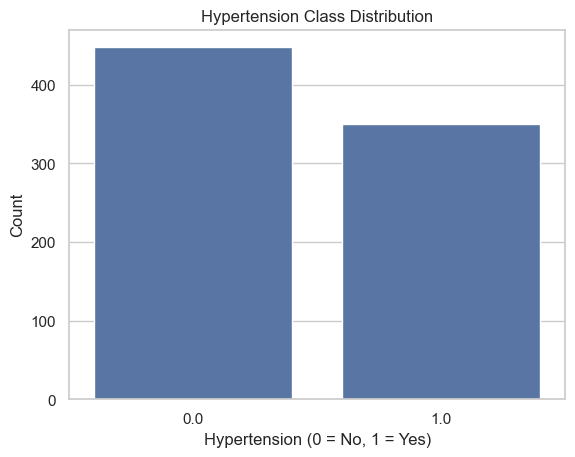

In [33]:
# Plot Hypertension Distribution
sns.countplot(x="Hypertension", data=df)
plt.title("Hypertension Class Distribution")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

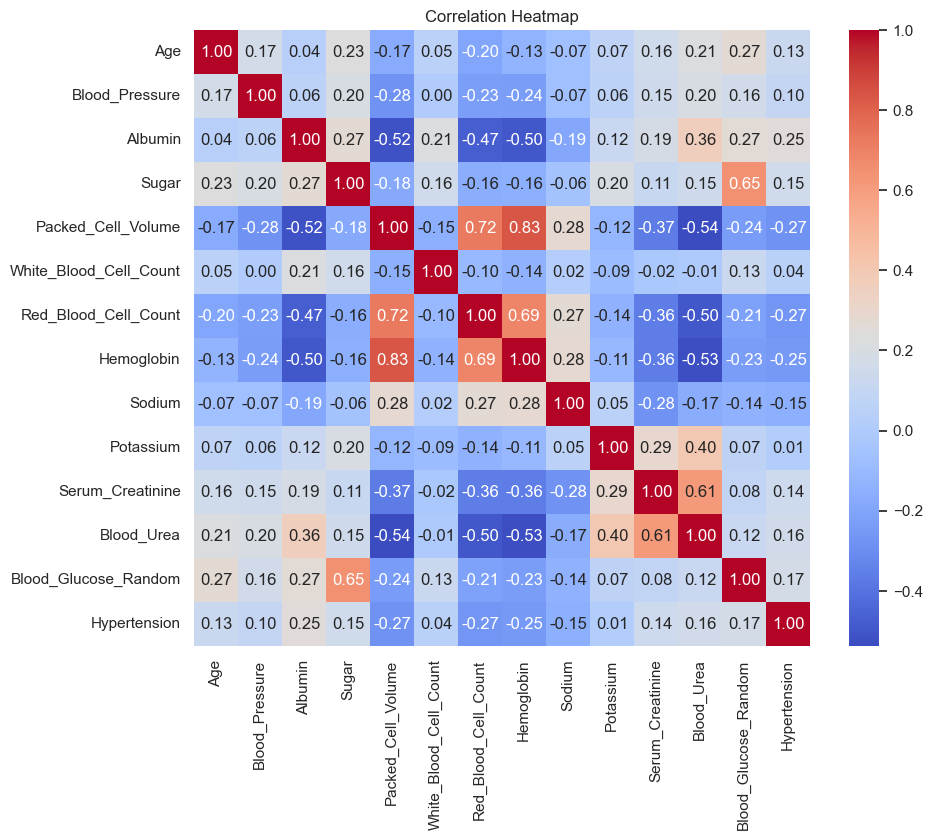

In [34]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[features + ["Hypertension"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

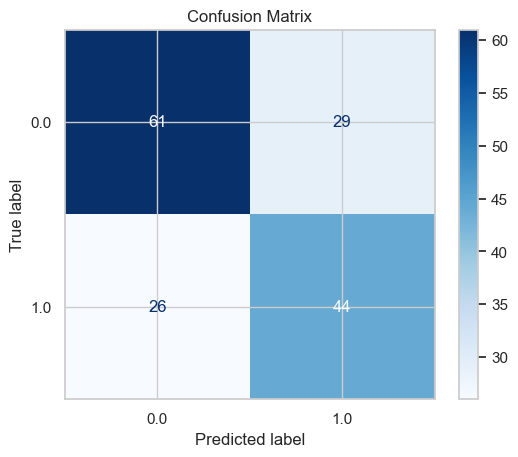

In [35]:
# Confusion Matrix Heatmap
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

Save the Model

In [36]:
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/ckd_logistic_model.joblib")
joblib.dump(scaler, "../models/ckd_scaler.joblib")

print("Model and scaler saved in /models")

Model and scaler saved in /models
